<a href="https://colab.research.google.com/github/williamedwardhahn/ComplexSystems/blob/main/MPCR_Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# http://lipas.uwasa.fi/~timan/sudoku/
# https://convert.town/replace-spaces-with-commas

In [ ]:
problem = np.array([
0,4,0,0,0,0,1,7,9,
0,0,2,0,0,8,0,5,4,
0,0,6,0,0,5,0,0,8,
0,8,0,0,7,0,9,1,0,
0,5,0,0,9,0,0,3,0,
0,1,9,0,6,0,0,4,0,
3,0,0,4,0,0,7,0,0,
5,7,0,1,0,0,2,0,0,
9,2,8,0,0,0,0,6,0])

In [ ]:
# problem = np.array([
# 0,0,0,0,0,3,0,1,7,
# 0,1,5,0,0,9,0,0,8,
# 0,6,0,0,0,0,0,0,0,
# 1,0,0,0,0,7,0,0,0,
# 0,0,9,0,0,0,2,0,0,
# 0,0,0,5,0,0,0,0,4,
# 0,0,0,0,0,0,0,2,0,
# 5,0,0,6,0,0,3,4,0,
# 3,4,0,2,0,0,0,0,0])

In [ ]:
# problem = np.array([
# 1,0,0,0,0,7,0,9,0,
# 0,3,0,0,2,0,0,0,8,
# 0,0,9,6,0,0,5,0,0,
# 0,0,5,3,0,0,9,0,0,
# 0,1,0,0,8,0,0,0,2,
# 6,0,0,0,0,4,0,0,0,
# 3,0,0,0,0,0,0,1,0,
# 0,4,0,0,0,0,0,0,7,
# 0,0,7,0,0,0,3,0,0])

In [ ]:
problem

array([0, 4, 0, 0, 0, 0, 1, 7, 9, 0, 0, 2, 0, 0, 8, 0, 5, 4, 0, 0, 6, 0,
       0, 5, 0, 0, 8, 0, 8, 0, 0, 7, 0, 9, 1, 0, 0, 5, 0, 0, 9, 0, 0, 3,
       0, 0, 1, 9, 0, 6, 0, 0, 4, 0, 3, 0, 0, 4, 0, 0, 7, 0, 0, 5, 7, 0,
       1, 0, 0, 2, 0, 0, 9, 2, 8, 0, 0, 0, 0, 6, 0])

In [ ]:
def print_sudoku(state):
    border = "------+-------+------"
    rows = [state[i:i+9] for i in range(0,81,9)]
    for i,row in enumerate(rows):
        if i % 3 == 0:
            print(border)
        three = [row[i:i+3] for i in range(0,9,3)]
        print(" | ".join(
            " ".join(str(x or "_") for x in one)
            for one in three
        ))
    print(border)

In [ ]:
print_sudoku(problem)

------+-------+------
_ 4 _ | _ _ _ | 1 7 9
_ _ 2 | _ _ 8 | _ 5 4
_ _ 6 | _ _ 5 | _ _ 8
------+-------+------
_ 8 _ | _ 7 _ | 9 1 _
_ 5 _ | _ 9 _ | _ 3 _
_ 1 9 | _ 6 _ | _ 4 _
------+-------+------
3 _ _ | 4 _ _ | 7 _ _
5 7 _ | 1 _ _ | 2 _ _
9 2 8 | _ _ _ | _ 6 _
------+-------+------


In [ ]:
problem

array([0, 4, 0, 0, 0, 0, 1, 7, 9, 0, 0, 2, 0, 0, 8, 0, 5, 4, 0, 0, 6, 0,
       0, 5, 0, 0, 8, 0, 8, 0, 0, 7, 0, 9, 1, 0, 0, 5, 0, 0, 9, 0, 0, 3,
       0, 0, 1, 9, 0, 6, 0, 0, 4, 0, 3, 0, 0, 4, 0, 0, 7, 0, 0, 5, 7, 0,
       1, 0, 0, 2, 0, 0, 9, 2, 8, 0, 0, 0, 0, 6, 0])

In [ ]:
fixed = np.where(problem)[0]

In [ ]:
fixed

array([ 1,  6,  7,  8, 11, 14, 16, 17, 20, 23, 26, 28, 31, 33, 34, 37, 40,
       43, 46, 47, 49, 52, 54, 57, 60, 63, 64, 66, 69, 72, 73, 74, 79])

In [ ]:
def block_indices(block_num):
    firstrow = (block_num // 3) * 3
    firstcol = (block_num % 3) * 3
    indices = [ 9*(firstrow+i) + (firstcol+j) for i in range(3) for j in range(3)]
    return indices

In [ ]:
def randomize_on_zeros(problem):
    solution = problem.copy()
    for block in range(9):
        indices = block_indices(block)
        block = problem[indices]
        zeros = [i for i in indices if problem[i] == 0]
        to_fill = [i for i in range(1, 10) if i not in block]
        random.shuffle(to_fill)
        for index, value in zip(zeros, to_fill):
            solution[index] = value
    return solution

In [ ]:
fixed

array([ 1,  6,  7,  8, 11, 14, 16, 17, 20, 23, 26, 28, 31, 33, 34, 37, 40,
       43, 46, 47, 49, 52, 54, 57, 60, 63, 64, 66, 69, 72, 73, 74, 79])

In [ ]:
block_indices(0)

[0, 1, 2, 9, 10, 11, 18, 19, 20]

In [ ]:
A = [i for i in block_indices(0) if i not in fixed]

In [ ]:
A

[0, 2, 9, 10, 18, 19]

In [ ]:
def move(state):
    
    state2 = state.copy()

    A = [i for i in block_indices(random.randrange(9)) if i not in fixed] # Don't move starting numbers
    
    m, n = random.sample(A, 2) #swap number within block

    state2[m], state2[n] = state2[n], state2[m]
    return state2

In [ ]:
def f(x):
    #Counts duplicates in rows and cols
    x = x.reshape(9,9)
    L = 0
    for i in range(9):
        L += 9 - len(np.unique(x[i,:]))
        L += 9 - len(np.unique(x[:,i]))
    return L

In [ ]:
print_sudoku(problem)

------+-------+------
_ 4 _ | _ _ _ | 1 7 9
_ _ 2 | _ _ 8 | _ 5 4
_ _ 6 | _ _ 5 | _ _ 8
------+-------+------
_ 8 _ | _ 7 _ | 9 1 _
_ 5 _ | _ 9 _ | _ 3 _
_ 1 9 | _ 6 _ | _ 4 _
------+-------+------
3 _ _ | 4 _ _ | 7 _ _
5 7 _ | 1 _ _ | 2 _ _
9 2 8 | _ _ _ | _ 6 _
------+-------+------


In [ ]:
state = randomize_on_zeros(problem)

In [ ]:
print_sudoku(state)

------+-------+------
8 4 5 | 1 2 6 | 1 7 9
3 1 2 | 3 7 8 | 2 5 4
7 9 6 | 4 9 5 | 6 3 8
------+-------+------
3 8 4 | 8 7 2 | 9 1 8
6 5 7 | 5 9 3 | 5 3 7
2 1 9 | 4 6 1 | 6 4 2
------+-------+------
3 6 1 | 4 2 9 | 7 8 1
5 7 4 | 1 3 7 | 2 5 4
9 2 8 | 5 6 8 | 9 6 3
------+-------+------


In [ ]:
t = np.linspace(0,1,1000000)
cooling_schedule = np.exp(-5*t)

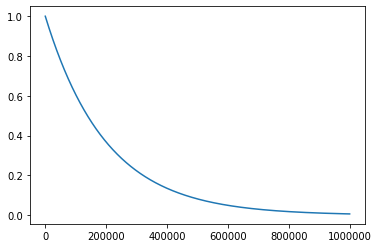

In [ ]:
plt.plot(cooling_schedule)

In [ ]:
best = 100
best_state = state
for T in cooling_schedule:

    state2 = move(state)

    delta = f(state) - f(state2) 

    if delta > 0 or  np.exp( delta / T) > np.random.random():

        state = state2
        
        if f(state) < best:
            best = f(state)
            best_state = state
            print(f(state))
            if best == 0:
                break

42
39
35
34
32
30
29
28
27
26
25
24
23
22
21
20
19
17
16
15
13
12
10
9
7
6
5
3
2
0


In [ ]:
print_sudoku(state)

------+-------+------
2 9 8 | 4 5 3 | 6 1 7
7 1 5 | 7 2 9 | 4 3 8
4 6 3 | 8 6 1 | 9 5 2
------+-------+------
1 2 4 | 9 3 7 | 5 8 6
8 5 9 | 1 4 6 | 2 7 3
6 3 7 | 5 8 2 | 1 9 4
------+-------+------
9 8 6 | 3 1 4 | 7 2 5
5 7 2 | 6 9 8 | 3 4 1
3 4 1 | 2 7 5 | 8 6 9
------+-------+------


In [ ]:
print_sudoku(problem)

------+-------+------
_ _ _ | _ _ 3 | _ 1 7
_ 1 5 | _ _ 9 | _ _ 8
_ 6 _ | _ _ _ | _ _ _
------+-------+------
1 _ _ | _ _ 7 | _ _ _
_ _ 9 | _ _ _ | 2 _ _
_ _ _ | 5 _ _ | _ _ 4
------+-------+------
_ _ _ | _ _ _ | _ 2 _
5 _ _ | 6 _ _ | 3 4 _
3 4 _ | 2 _ _ | _ _ _
------+-------+------


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource

In [ ]:
def surf(x,y,z,a,b):
    
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    fig.set_size_inches(10, 10)
    ls = LightSource(270, 45)
    rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                   linewidth=0, antialiased=False, shade=False)
    ax.view_init(a,b)
    plt.show() 

In [ ]:
t = np.linspace(0.01,1,100)
d = np.linspace(-1,0,100)

In [ ]:
tt, dd = np.meshgrid(t,d)

In [ ]:
A = np.exp( dd // tt)

In [ ]:
surf(dd,tt,dd//tt,20,40)